# Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
from IPython.display import Image

## Initialize test data

In [3]:
# generate data exactly as in the example
rng = np.random.RandomState(0)
X = rng.uniform(0, 5, 20)[:, np.newaxis]
y = 0.5 * np.sin(3 * X[:, 0]) + rng.normal(0, 0.5, X.shape[0])

In [4]:
X_ = np.linspace(0, 5, 100)

In [5]:
kernel1 = 1.0 * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))
kernel2 = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1e-5, noise_level_bounds=(1e-10, 1e+1))

## Some support functions

In [6]:
def print_GPs(GPs, name):
    plt.plot(X_, 0.5*np.sin(3*X_), label='ground truth')
    for i, gp in enumerate(GPs):
        print('gp - '+name+' (',i+1,'): ', gp, '\nkernel:', gp.kernel_)
        print('theta:', gp.kernel_.theta, np.exp(gp.kernel_.theta))
        print('likelihood:', gp.log_marginal_likelihood_value_)


    for i, gp in enumerate(GPs):
        y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)
        #plt.plot(X_, y_mean, 'k', lw=3, zorder=9, label='sklearn kernel: '+str(i+1))
        plt.plot(X_, y_mean, label='sklearn kernel: '+str(i+1))

    plt.legend()
    plt.tight_layout()

In [7]:
def make_plots(GPs):
    fig, ax = plt.subplots(2,1, figsize=(12,10))
    #plt.title('Log Marginal Likelihood Surfaces with Prediction')
    for i, gp in enumerate(GPs):
        ax = plt.subplot(2,1,i+1)
        #ax = plt.subplot(1,1,1)

        plt.scatter(np.exp(gp.kernel_.theta[1]), np.exp(gp.kernel_.theta[2]), c='red', marker='x')

        a, b = gp.kernel_.bounds[1:]
        theta0 = np.linspace(a[0], a[1], 49)
        theta1 = np.linspace(b[0], b[1], 50)
        Theta0, Theta1 = np.meshgrid(theta0, theta1)
        LML = np.empty(Theta0.shape)
        for i in range(Theta0.shape[0]):
            for j in range(Theta0.shape[1]):
                LML[i,j] = gp.log_marginal_likelihood(np.array([gp.kernel_.theta[0], Theta0[i, j], Theta1[i, j]]))

        #LML = np.array(LML).T
        vmin, vmax = (-LML).min(), (-LML).max()
        level = np.around(np.logspace(np.log10(vmin), np.log10(vmax), 50), decimals=1)
        plt.contour(np.exp(Theta0), np.exp(Theta1), -LML,
                    levels=level, colors='black', linewidths=1., norm=LogNorm(vmin=vmin, vmax=vmax))
        plt.yscale('log')
        plt.xscale('log')
        subAx = inset_axes(ax,
                        width="70%", # width = 30% of parent_bbox
                        height="60%", # height : 1 inch
                        loc='lower right')
        subAx.plot(X_, 0.5*np.sin(3*X_), color='black', label='ground truth')
        y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)
        subAx.plot(X_, y_mean, label='prediction')

        subAx.scatter(X, y, color='black', marker='o')
        subAx.fill_between(X_, y_mean - np.sqrt(np.diag(y_cov)),
                     y_mean + np.sqrt(np.diag(y_cov)),
                     alpha=0.5, color='grey')
        subAx.set_xticks([])
        subAx.set_xticks([], minor=True)
        subAx.set_yticks([])
        subAx.set_yticks([], minor=True)

        subAx.legend()
    #plt.show()
    plt.savefig('scipy_plot')

## Run sklearn example

In [8]:
def sklearn_ex():

    gp1 = GaussianProcessRegressor(kernel=kernel1,
                                 alpha=0.0).fit(X, y)

    gp2 = GaussianProcessRegressor(kernel=kernel2,
                                  alpha=0.0).fit(X, y)
    
    kernels = [kernel1, kernel2]
    GPs = [gp1, gp2]

    print_GPs(GPs, 'sklearn')
    return GPs

gp - sklearn ( 1 ):  GaussianProcessRegressor(alpha=0.0,
                         kernel=1**2 * RBF(length_scale=100) + WhiteKernel(noise_level=1)) 
kernel: 0.00316**2 * RBF(length_scale=109) + WhiteKernel(noise_level=0.637)
theta: [-11.51292546   4.69457218  -0.45065571] [1.00000000e-05 1.09352016e+02 6.37210191e-01]
likelihood: -23.87233736198489
gp - sklearn ( 2 ):  GaussianProcessRegressor(alpha=0.0,
                         kernel=1**2 * RBF(length_scale=1) + WhiteKernel(noise_level=1e-05)) 
kernel: 0.64**2 * RBF(length_scale=0.365) + WhiteKernel(noise_level=0.294)
theta: [-0.89336431 -1.00663819 -1.22409422] [0.4092765  0.36544547 0.2940239 ]
likelihood: -21.80509089016203


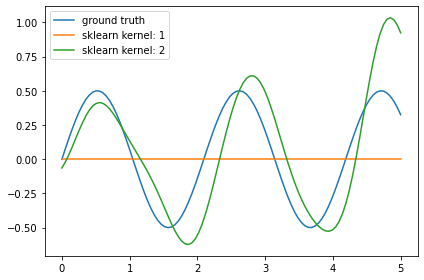

In [9]:
sklearn_gps = sklearn_ex()

In [1]:
make_plots(sklearn_gps)

NameError: name 'make_plots' is not defined